In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 

In [2]:
crime=pd.read_excel("./CyberCrimeStateWise.xls")
Cybercrime=pd.read_csv("./Cyber crime2019.csv")


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


**Algorithm: K-means clustering**

In [4]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

import seaborn as sns
import pandas.util.testing as tm


In [5]:
crime.columns = crime.columns.astype(str)

numeric_columns = crime.select_dtypes(include=['float64', 'int64']).columns
scaler = preprocessing.StandardScaler()
data_scaled = crime.copy()  # Create a copy of the original data
data_scaled[numeric_columns] = scaler.fit_transform(crime[numeric_columns])


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_scaled)

                S. No           Category           State/UT      2016  \
0                   1              State     Andhra Pradesh -0.123229   
1                   2              State  Arunachal Pradesh -0.350754   
2                   3              State              Assam -0.093487   
3                   4              State              Bihar -0.237363   
4                   5              State       Chhattisgarh -0.318781   
5                   6              State                Goa -0.340716   
6                   7              State            Gujarat -0.217659   
7                   8              State            Haryana -0.203160   
8                   9              State   Himachal Pradesh -0.340716   
9                  10              State    Jammu & Kashmir -0.341831   
10                 11              State          Jharkhand -0.255952   
11                 12              State          Karnataka  0.057081   
12                 13              State           

**Elbow method**

c:\Users\asus\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


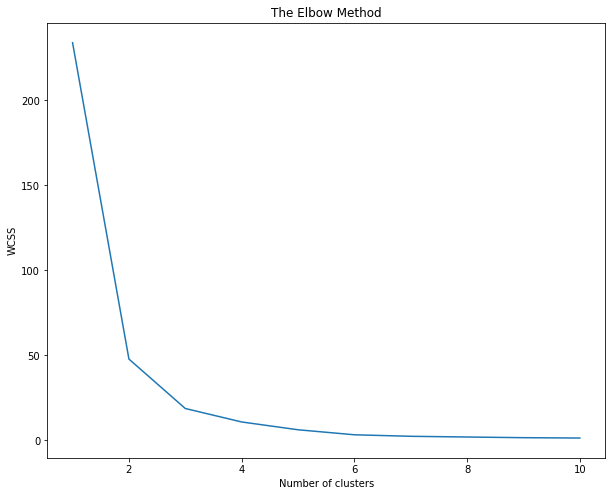

kmeans


In [6]:


plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=23)
      kmeans.fit(data_scaled[numeric_columns])
      wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


print("kmeans")

In [7]:
numeric_columns = data_scaled.select_dtypes(include=['float64', 'int64']).columns
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled[numeric_columns])

y_kmeans


array([1, 3, 2, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 3, 3, 2, 3, 3, 0])

In [8]:
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime['cluster'] = cluster

**Mean of Cluster**

In [9]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
cluster,,,,,,
1,12252.0,21694.5,27126.0,99.6,13115.8,2.1
2,713.1,1240.9,1383.6,5.1,542.7,2.3
3,599.0,1431.3,2621.7,9.6,331.9,6.9
4,122.0,176.3,191.6,0.7,282.8,0.7


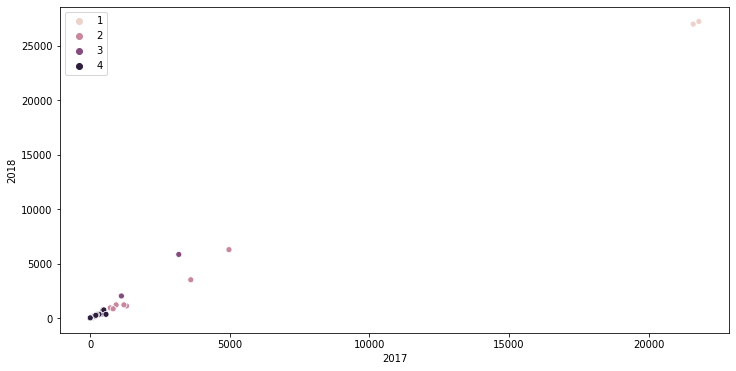

In [10]:

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['2017'], y = crime['2018'],hue=y_kmeans1)

**Mean estimated Rate of Cyber Crimes 2018**

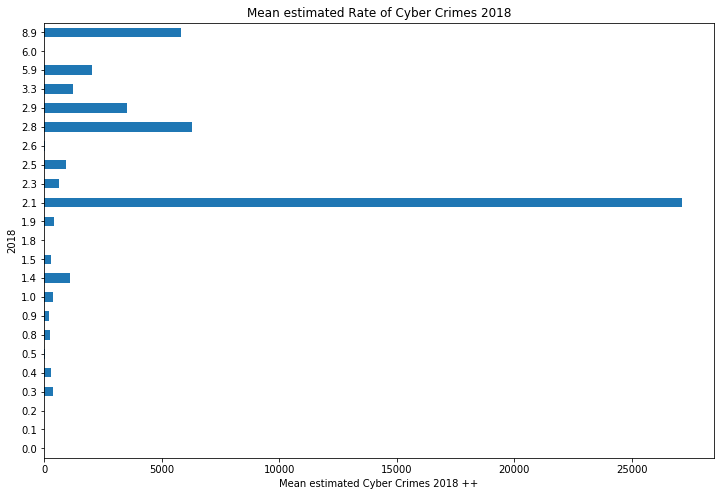

In [11]:
ax = crime.groupby('Rate of Total Cyber Crimes (2018)++')['2018'].mean().plot(kind='barh', figsize=(12,8),
title='Mean estimated Rate of Cyber Crimes 2018')
plt.xlabel('Mean estimated Cyber Crimes 2018 ++')
plt.ylabel('2018')
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('CyberCrimeStateWise.xls')

# Data Exploration
print("Dataset dimensions:", df.shape)
print("Column names and data types:")
print(df.dtypes)
print("Preview of the dataset:")
print(df.head())

# Data Analysis
# Distribution of cyber crime incidents across states
state_counts = df['State/UT'].value_counts()
print("Number of cyber crime incidents by state:")
print(state_counts)

# Summary statistics
total_incidents = df['Rate of Total Cyber Crimes (2018)++'].sum()
average_incidents = df['Rate of Total Cyber Crimes (2018)++'].mean()
print("Total number of cyber crime incidents:", total_incidents)
print("Average number of cyber crime incidents per state:", average_incidents)

# States with the highest and lowest number of cyber crime incidents
state_with_most_incidents = state_counts.idxmax()
state_with_least_incidents = state_counts.idxmin()
print("State with the highest number of cyber crime incidents:", state_with_most_incidents)
print("State with the lowest number of cyber crime incidents:", state_with_least_incidents)



WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Dataset dimensions: (39, 9)
Column names and data types:
S. No                                                object
Category                                             object
State/UT                                             object
2016                                                  int64
2017                                                  int64
2018                                                  int64
Percentage Share of State/UT (2018)                 float64
Mid-Year Projected Population (in Lakhs) (2018)+    float64
Rate of Total Cyber Crimes (2018)++                 float64
dtype: object
Preview of the dataset:
  S. No Category           State/UT  2016  2017  2018  \
0     1    State     Andhra Pradesh   616   931  1207   
1     2    State  Arunachal Pradesh     4     1     7   
2     3    State              Assam   696  1120  2022   
3     4    State              Bihar   309   433   374   
4     5